# Predicting Eucalyptus Species Selection for Soil Conservation
Group50:

            Student Id: S3799691             Student Name: Gaurav Diwan
            Student Id: S3806039             Student Name: Suman Reddy Regatti
## Introduction

The objective was to determine which seedlots in a species are best for soil conservation in seasonally dry hill country. Determination is found by measurement of height, diameter by height, survival, and other contributing factors. The dataset was sourced from the openMl at https://openml.org/d/188.

This report is organized as follows:


- <a href='#Overview'>Overview</a> section describes the dataset used and the features in this dataset.
- <a href='#Data-Preparation'>Data Preparation</a> section covers data cleaning and data preparation steps. 
- <a href='#Data-Exploration'>Data Exploration</a> section explores dataset features and their inter-relationships.

- <a href='#Model-Implementation-and-Hyperparameter-Tuning'>Model Implementation and Hyperparameter Tuning</a> describes the hyperparameter tuning process for each classification algorithm. 

- <a href='#Performance-Comparison'>Performance Comparison</a> presents model performance comparison results.
- <a href='#Limitations-and-Solutions'>Limitations and Solutions</a> discusses a limitations of our approach and possible solutions.
- <a href='#Summary'>Summary</a> section provides a summary of our work and presents our findings.

# Overview

We use dataset_194_eucalyptus.csv from openML Repository for predicting best species for soil conservation. We have renamed the csv as group50 for  working on the project. The  dataset has 736 observations (a.k.a. instances or records) and 19 descriptive (a.k.a. independent) features and one target (a.k.a. response or dependent) feature 'Utility'. The target feature utility is categorical feature with average, best, good, low and none values.Hence our project is classification problem.

The descriptive features below are produced from the crx.names file:

    - Abbrev(Site Abbreviation): 'Cra', 'Cly', 'Nga', 'Wai', 'K81', 'Wak', 'K82', 'WSp', 'K83', 'Lon', 'Puk',
                                        'Paw','K81a','Mor','Wen','WSh'
    - Rep(Replicate): 1, 2, 3, 22
    - Locality: 'Central_Hawkes_Bay','Northern_Hawkes_Bay','Southern_Hawkes_Bay','Central_Hawkes_Bay_(coastal)',
               'South_Wairarapa', 'Central_Wairarapa','Southern_Hawkes_Bay_(coastal)','Central_Poverty_Bay'
    - Map_Ref: 'N135_382/137', 'N116_848/985', 'N145_874/586','N142_377/957','N158_344/626', 'N162_081/300','N158_343/625', 
               'N151_912/221','N162_097/424', 'N166_063/197', 'N146_273/737', 'N141_295/063', 'N98_539/567', 'N151_922/226'
    - Latitude: '39__38','39__00','40__11','39__50','40__57','41__12','40__36','41__08','41__16', '40__00','39__43','82__32'
    - Altitude: 100, 200, 130,  70, 180, 160, 150, 220, 300
    - Rainfall: 850, 1400, 1000, 1080, 1250, 1050, 1200, 1300,  900, 1750
    - Frosts: -2, -3
    - Year: 1980, 1981, 1982, 1983, 1986
    - Sp(Species): 'co', 'fr', 'ma', 'nd', 'ni', 'ob', 'ov', 'pu', 'rd', 'si', 
                   'mn','ag', 'bxs','br','el', 'fa', 'jo', 'ka', 're', 'sm', 'ro', 'nc', 'am', 'cr', 'pa', 'ra', 'te'
    - PMCno(Seedlot Number): continuous
    - DBH(Diameter base height, cm): continuous 
    - Ht(Height): continuous
    - Surv(Survival): continuous
    - Vig(Vigour): continuous
    - Ins_res(Insect resistance): continuous
    - Stem_Fm(Stem Form): continuous
    - Crown_Fm(Crown Form): continuous
    - Brnch_Fm(Branch Form): continuous

# Data Preparation


Read the dataset from  local environment into dataframe df.

In [1]:
# Set a  seed value
seed_value = 999
# Initialise `PYTHONHASHSEED` environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# Initialise Python's own pseudo-random generator
import random
random.seed(seed_value)
# Initialise Numpy's pseudo-random generator
import numpy as np
import pandas as pd
np.random.seed(seed_value)
#import necessary libraries

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
# getting the data from local directory
pd.set_option('display.max_columns', None) 
data=pd.read_csv('Group50_Data.csv')

We first confirm that the feature types match the descriptions outlined in the documentation.

In [3]:
print(f"Shape of the dataset is {data.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(data.dtypes)

Shape of the dataset is (736, 20) 

Data types are below where 'object' indicates a string type: 
Abbrev      object
Rep          int64
Locality    object
Map_Ref     object
Latitude    object
Altitude     int64
Rainfall     int64
Frosts       int64
Year         int64
Sp          object
PMCno       object
DBH         object
Ht          object
Surv        object
Vig         object
Ins_res     object
Stem_Fm     object
Crown_Fm    object
Brnch_Fm    object
Utility     object
dtype: object


In [4]:
# changing datatype for the below columns as they are imported as categorical as they have inconsistencies
for col in ['PMCno', 'DBH', 'Ht', 'Surv', 'Vig', 'Ins_res', 'Stem_Fm', 'Crown_Fm','Brnch_Fm']:
    data[col] =pd.to_numeric(data[col], errors='coerce')

In [5]:
data.dtypes # check the datatypes after converting them to respective datatypes.

Abbrev       object
Rep           int64
Locality     object
Map_Ref      object
Latitude     object
Altitude      int64
Rainfall      int64
Frosts        int64
Year          int64
Sp           object
PMCno       float64
DBH         float64
Ht          float64
Surv        float64
Vig         float64
Ins_res     float64
Stem_Fm     float64
Crown_Fm    float64
Brnch_Fm    float64
Utility      object
dtype: object

In [6]:
# Display randomly selected 10 rows
data.sample(10,random_state=99)

,Abbrev,Rep,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
172,K81,2,Central_Wairarapa,N158_344/626,40__57,180,1080,-3,1981,fa,1482.0,11.03,6.25,38.0,3.5,3.5,3.0,2.5,2.0,average
459,Lon,2,South_Wairarapa,N162_097/424,41__08,220,1050,-2,1983,fa,2548.0,13.70,5.35,88.0,4.0,3.0,2.0,3.0,1.5,good
429,K83,3,Central_Wairarapa,N158_344/626,40__57,180,1080,-3,1983,ni,2568.0,9.13,7.02,13.0,2.8,2.5,3.0,3.0,2.5,low
584,Paw,1,Southern_Hawkes_Bay_(coastal),N146_273/737,40__00,150,1300,-2,1983,nd,2569.0,22.15,14.57,20.0,3.0,4.0,3.0,3.4,3.0,good
607,Paw,2,Southern_Hawkes_Bay_(coastal),N146_273/737,40__00,150,1300,-2,1983,ob,1522.0,52.26,15.45,10.0,5.0,4.5,2.5,2.0,2.5,good
574,Paw,1,Southern_Hawkes_Bay_(coastal),N146_273/737,40__00,150,1300,-2,1983,am,1592.0,43.29,17.20,20.0,4.5,4.5,3.7,4.0,3.0,best
155,K81,1,Central_Wairarapa,N158_344/626,40__57,180,1080,-3,1981,ob,2469.0,19.92,7.37,13.0,2.0,2.5,3.0,3.0,3.0,low
22,Cra,3,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,ma,1362.0,15.22,6.50,30.0,3.0,4.0,3.0,3.0,3.0,average
208,K81,3,Central_Wairarapa,N158_344/626,40__57,180,1080,-3,1981,rd,1524.0,4.49,4.49,88.0,2.3,2.0,2.5,4.0,3.0,low
113,Wai,2,Central_Hawkes_Bay_(coastal),N142_377/957,39__50,70,1000,-2,1981,ov,1785.0,9.80,7.50,75.0,1.7,1.3,3.3,4.0,3.5,low


### Data Cleaning 

Observe most of the observations with site abbreviation 'Mor' and 'Wen' have no information with respect to columns that we are going to explore and also the target variable has no recorded information. For columns 'Rep', 'Locality', 'Map_Ref', 'Latitude', 'Altitude', 'Rainfall','Frosts' has no impact on columns that we explore in Data Exploration Step. So we remove the observations with Abbrev 'Mor' and 'Wen' and also drop the columns 'Rep', 'Locality', 'Map_Ref', 'Latitude', 'Altitude', 'Rainfall' and 'Frosts'.

In [7]:
data= data[data['Abbrev'] != 'Mor'] # removing observations 'Mor'
data=data[data['Abbrev'] != 'Wen'] # removing observations 'Wen'
data.shape

(667, 20)

In [8]:
# dropping irrelevant columns
data.drop(['Rep','Locality','Map_Ref','Latitude','Altitude','Rainfall','Frosts'],axis=1,inplace=True)
data.shape

(667, 13)

In [9]:
# reset index
data.reset_index()
data.sample(10,random_state=99)

,Abbrev,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
461,Lon,1983,nd,2569.0,20.86,9.89,25.0,1.5,3.0,3.0,3.0,3.0,none
15,Cra,1980,ob,1522.0,13.08,9.79,90.0,5.0,4.5,5.0,4.0,4.0,best
415,K83,1983,pu,2573.0,1.48,2.96,13.0,1.0,3.0,3.0,3.0,3.0,none
559,Puk,1982,nd,2634.0,16.30,7.84,100.0,3.0,3.0,3.0,3.0,3.0,average
640,K81a,1981,re,2574.0,11.62,7.40,33.0,3.0,3.0,3.5,3.5,3.3,average
611,Paw,1983,re,2550.0,27.97,14.65,10.0,3.0,3.5,3.5,3.0,3.0,good
368,WSp,1983,am,1592.0,18.40,14.18,50.0,3.5,3.2,2.0,2.5,1.5,good
336,WSp,1983,ni,2547.0,20.80,10.23,13.0,3.0,3.0,3.0,2.5,3.0,average
316,K82,1982,sm,1340.0,2.10,3.85,25.0,1.0,2.0,3.0,3.0,3.0,none
107,Wai,1981,fr,2447.0,20.80,12.60,63.0,4.0,3.0,3.3,3.5,3.5,good


### Handling outliers 

In next step of Data preprocessing, we check for outliers. One way is through describe function and other way is plotting boxplot for each column and detecting outliers. To get clear picture for detecting more outliers in columns we plot the boxplot and remove them using quantile method. For features having outliers upper bound we are 99% of those values excluding the 1 % upper values and for outliers in lower bound we are excluding the 1 % values from the lower bound and including the values higher than 1%.

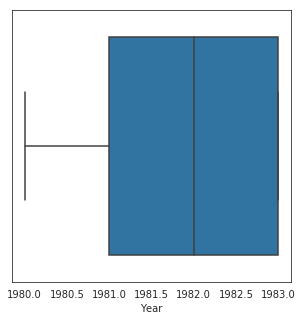

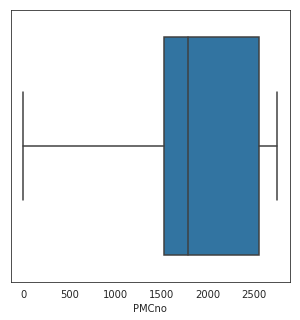

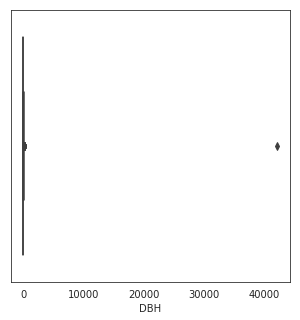

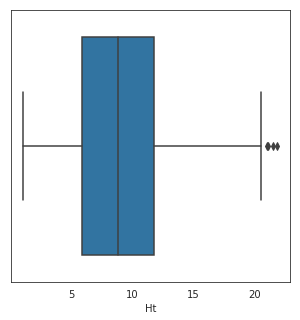

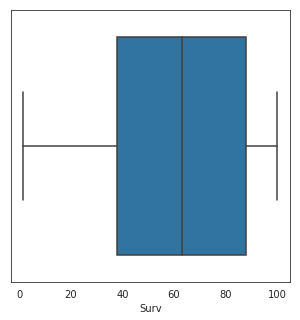

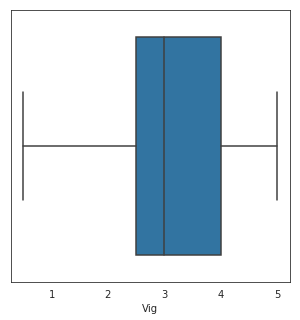

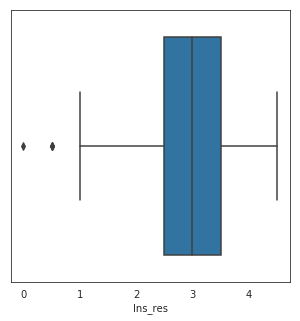

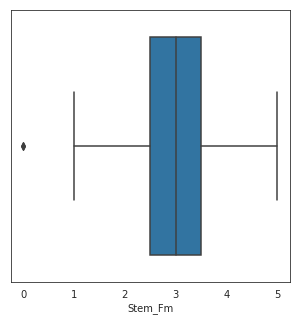

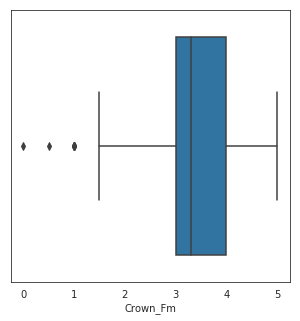

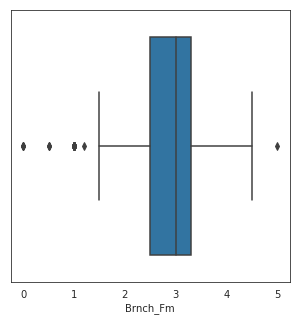

In [10]:
for col in data.columns[data.dtypes != 'O']:
    plt.figure(figsize=(5,5))
    sns.boxplot(data[col])

In [11]:
data_before_outlier = data.copy()

In [12]:
data = data[data['DBH']< data['DBH'].quantile(.999)]
data = data[data['Ht']< data['Ht'].quantile(.999)]
data = data[data['Ins_res']> data['Ins_res'].quantile(.005)]
data = data[data['Crown_Fm']> data['Crown_Fm'].quantile(.01)]
data = data[data['Brnch_Fm']> data['Brnch_Fm'].quantile(.01)]

In [13]:
data.shape

(631, 13)

### Checking and Imputing missing values

Check for the missing values in all the columns

In [14]:
data.isna().sum()

Abbrev       0
Year         0
Sp           0
PMCno        1
DBH          0
Ht           0
Surv        21
Vig          0
Ins_res      0
Stem_Fm      0
Crown_Fm     0
Brnch_Fm     0
Utility      0
dtype: int64

Impute the missing values in PMCno with median of the each species.

In [15]:
data[data['Sp']=='re']['PMCno'].median()

2550.0

In [16]:
# replace with the median as it is left skewed
data['PMCno'].fillna(2550,inplace=True)

We impute the missing values in 'Surv' with the mean of each species. For this we calculate the mean for each species.

In [17]:
# calculating mean for each species
sp_mean = data.groupby(['Sp'])['Surv'].mean().round(2)
sp_mean

Sp
ag     34.94
am     59.14
br     84.67
bxs    67.18
co     58.19
cr     69.64
el     36.95
fa     61.94
fr     58.22
jo     75.17
ka     57.50
ma     46.67
mn     20.00
nc     42.80
nd     60.12
ni     64.04
ob     55.25
ov     59.36
pa     61.12
pu     61.69
rd     61.00
re     61.30
ro     69.00
si     42.39
sm     71.30
Name: Surv, dtype: float64

In [18]:
# replacing with the mean of each species
data['Surv'] = data['Surv'].fillna(data.groupby('Sp')['Surv'].transform('mean'))


Finally, we check if missing values are imputed?

In [19]:
# missing values handled
data.isna().sum()

Abbrev      0
Year        0
Sp          0
PMCno       0
DBH         0
Ht          0
Surv        0
Vig         0
Ins_res     0
Stem_Fm     0
Crown_Fm    0
Brnch_Fm    0
Utility     0
dtype: int64

# Data Exploration

Next step for our analysis is Data Exploration. In this step we explore the relationship between the descriptive features and how would these relationships would expand our data modeling for predicting the outcome. For these we are cosidering the dependent descriptive features Abbrev,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm and the target feature 'utility' for our data exploration.
### Univariate Visualisation

We get insights exploring which Euclayptus species has best soil conservation and also which location(site Abbreviation) is best suited for conservation from below bar charts and summary statistics.	Upon analysis from the below bar chart and stacked bar chart we draw attention that larger growing species seem more suited to dry hill country areas, such as Puk,K81a,K81.


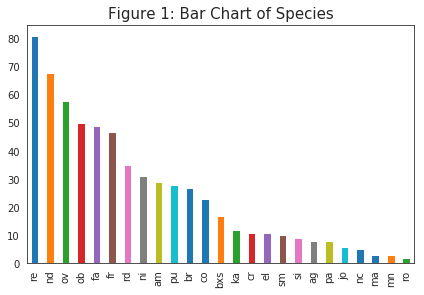

In [20]:
ax1 = data['Sp'].value_counts().plot(kind = 'bar')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of Species', fontsize = 15)
plt.show();

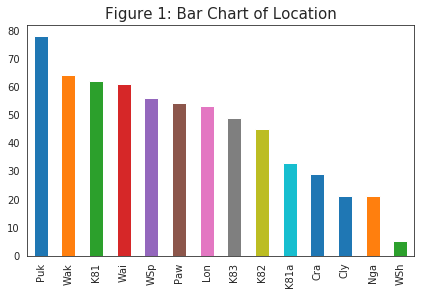

In [21]:
ax2 = data['Abbrev'].value_counts().plot(kind = 'bar')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of Location', fontsize = 15)
plt.show();

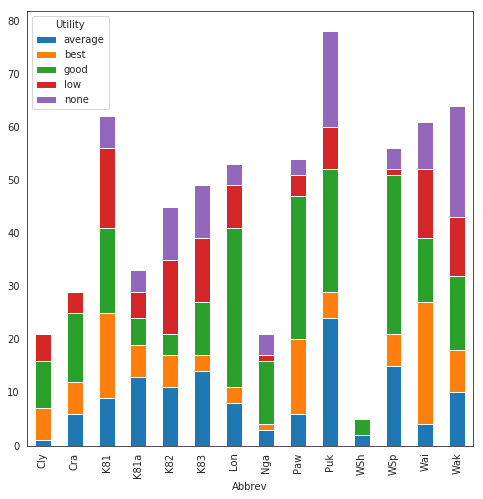

In [22]:
z2= pd.crosstab(index=data['Abbrev'],columns=data['Utility'])
z2.plot(kind='bar',stacked=True,figsize=(8,8))

We further analyse each depending factors (ie: all the numerical columns) to check the distribution and analyse Branch_Fm and Ht are normally distributed.

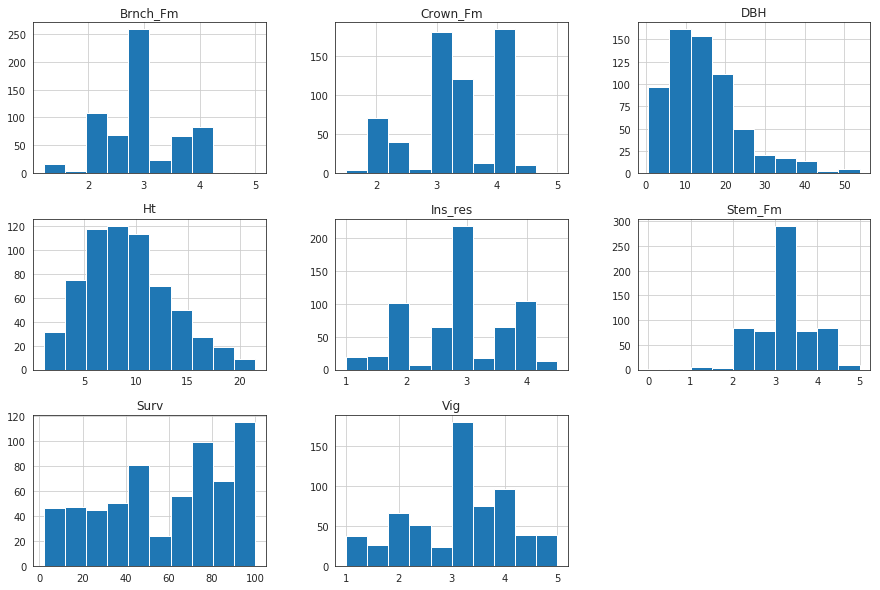

In [23]:
num_features = data[['DBH','Ht','Surv','Vig','Ins_res','Stem_Fm','Crown_Fm','Brnch_Fm']]
num_features.hist(figsize=[15,10])
plt.show()

### Bivariate Analysis

In bivariate analysis, we visualise two descriptive features with target variable to get insights how it is dependent to predict the outcome for our modeling. We consider which species with seedlot number has more percentage of having good and best utility. 

In [24]:
data.groupby(['Sp','PMCno'])['Utility'].value_counts(normalize=True).mul(100)

Sp   PMCno   Utility
ag   1094.0  none        75.000000
             low         25.000000
am   1592.0  good        66.666667
             best        20.000000
             average     13.333333
     2560.0  good        42.857143
             average     35.714286
             best        21.428571
br   1112.0  low         37.500000
             best        25.000000
             average     12.500000
             good        12.500000
             none        12.500000
     1113.0  low         50.000000
             average     25.000000
             none        25.000000
     2620.0  low         60.000000
             none        40.000000
     2621.0  low         66.666667
             average     33.333333
bxs  1111.0  average     41.176471
             good        23.529412
             low         17.647059
             none        17.647059
co   1.0     average    100.000000
     1520.0  low         42.857143
             average     28.571429
             good        28.571429

Now exploring relationship with diameter based height(DBH) with respect to height(Ht) of Eucalyptus trees and similarly we find relationship with 'Crown_Fm' and 'Brnch_Fm' and get some insights how eucalyptus tree crown features the branches to grow out from the main trunk. From below scatter plot visualisations,  the analysis on these dependant factors give good and best  outcomes with respect to target outcome.

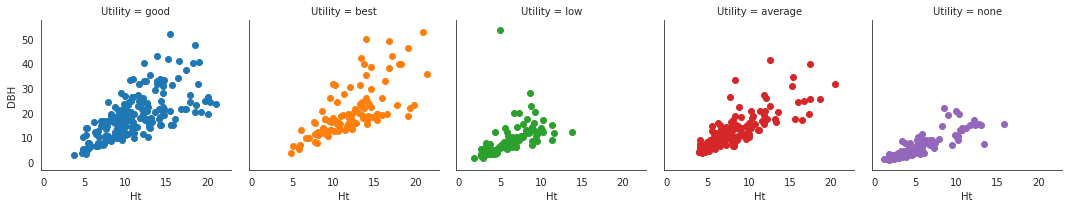

In [25]:
g=sns.FacetGrid(data,col='Utility',hue='Utility')
g= g.map(plt.scatter,'Ht','DBH')

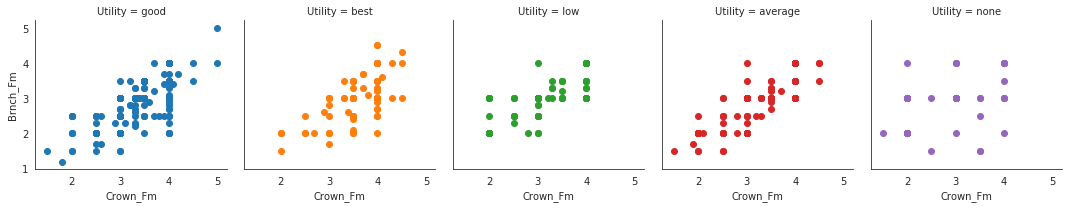

In [26]:
g1=sns.FacetGrid(data,col='Utility',hue='Utility')
g1= g1.map(plt.scatter,'Crown_Fm','Brnch_Fm')

### Multivariate Analysis
For predicting which seedlots in a species are best for soil conservation we are going to plot a heatmap for all the contributing factor columns such as DBH, HT, Surv etc and check higly correlated columns. From below heatmap, DBH vs HT and Crown_Fm vs Branch_Fm are highly correlated.

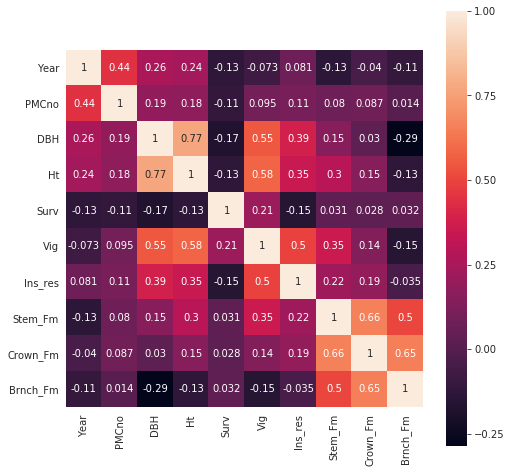

In [27]:
data2=data.copy()
corrmat = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrmat, annot= True,square=True)

For our further analysis,the conclusion drawn from above bivariate analysis with good and best outcomes with respect to some of the dependent features, we mask the good and best together to **good** and low, average and none to **not_good**.

In [28]:
mask= data.copy()
mask['Utility'] = mask['Utility'].replace(['good','best'], 'good')# masking good and best to good category
mask['Utility'] = mask['Utility'].replace(['low','average','none'], 'not_good')# making low average and none to not_good category
mask2= data['Utility'] != 'none' # exclude none and see overall observations of low average best and good
data[mask2].shape

(538, 13)

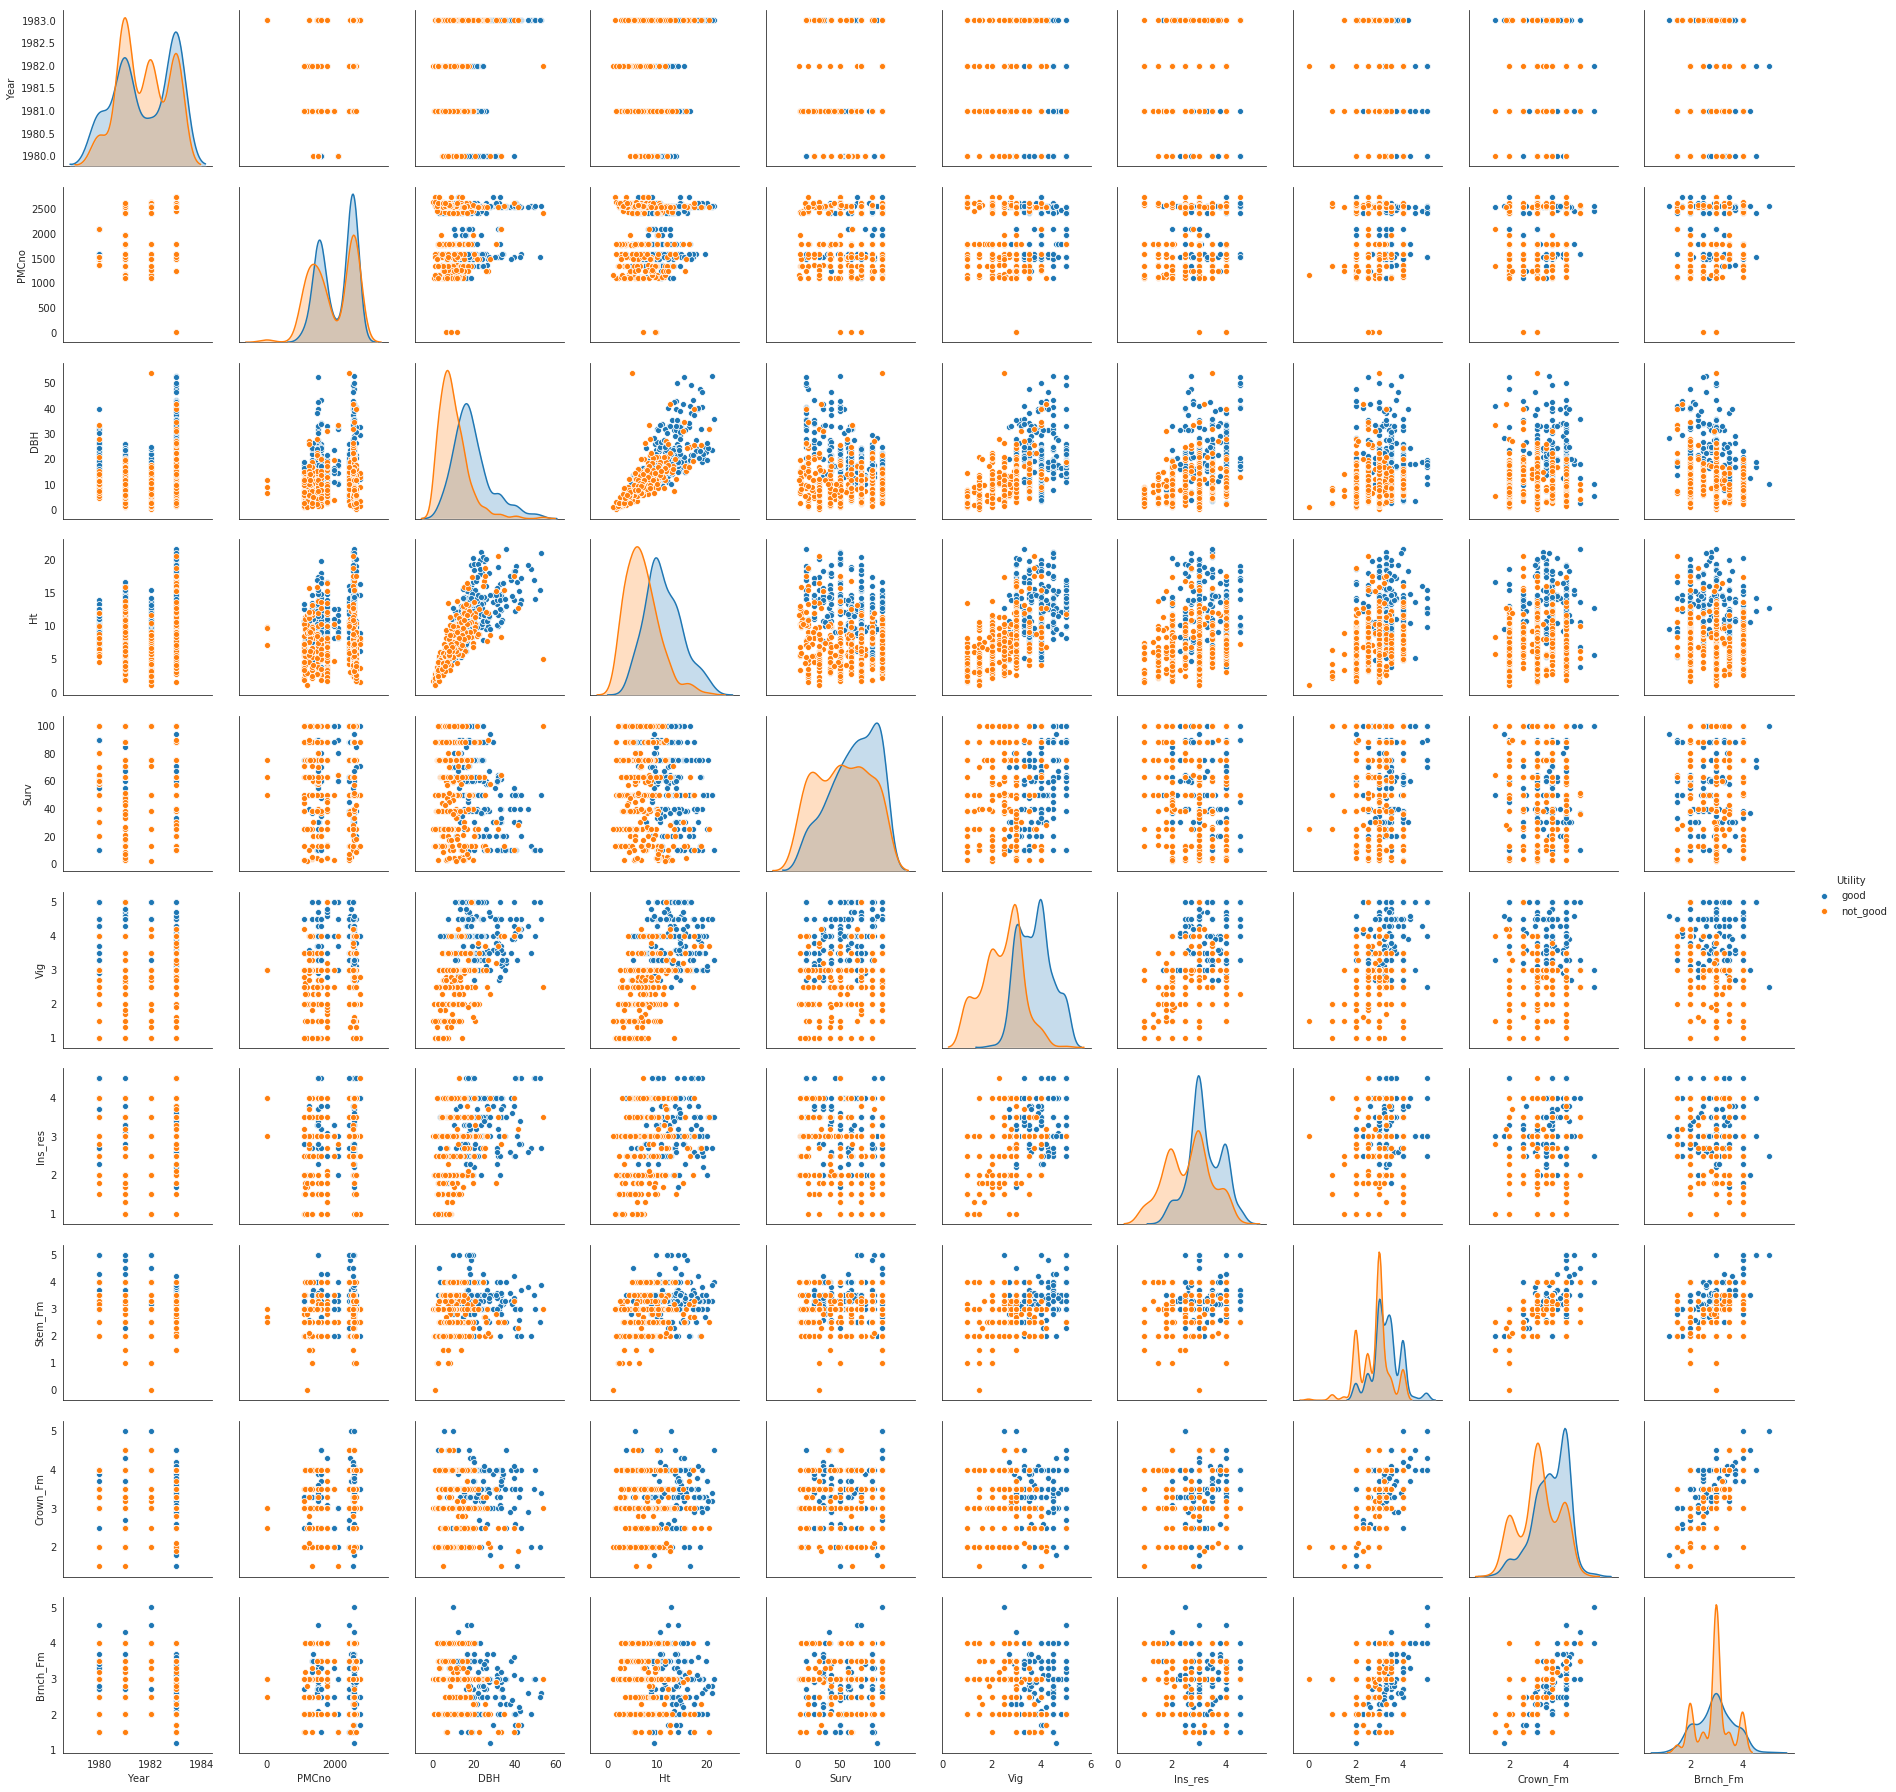

In [29]:
sns.pairplot(mask,hue='Utility')

Excluding none from the above analysis and check how the dependent features have an impact without **none** with respect to target feature.

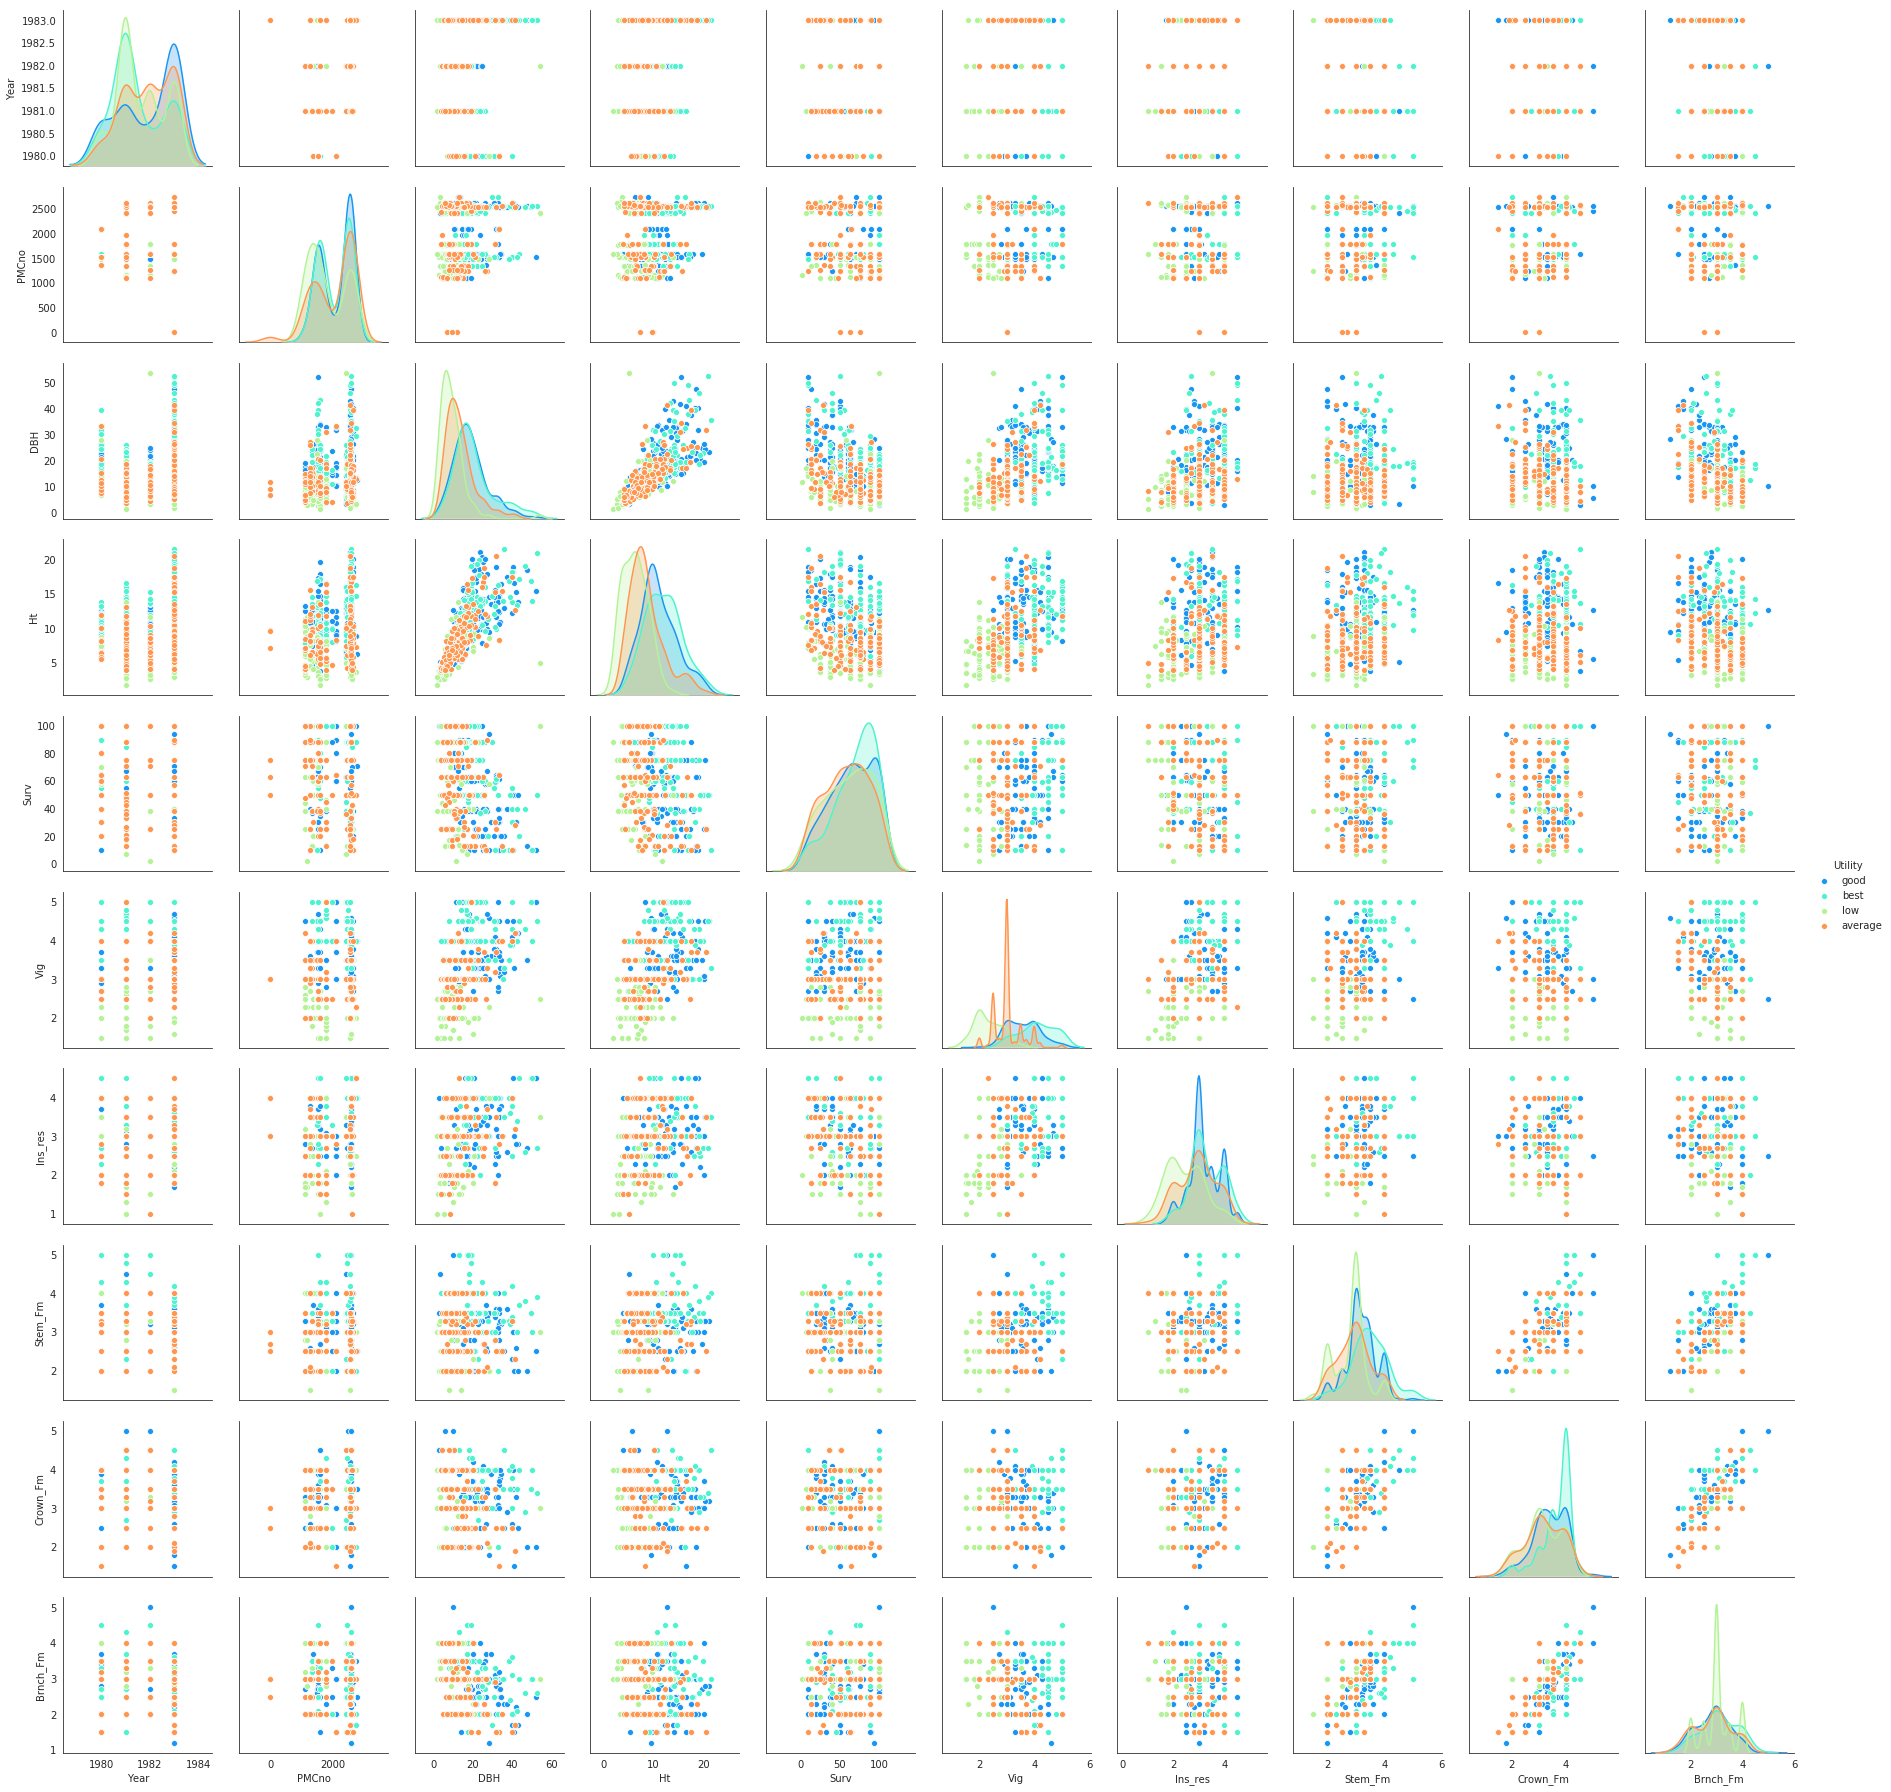

In [30]:
sns.pairplot(data[mask2],hue='Utility',palette='rainbow')

### Methodology

We consider the following  classifiers to predict multiclass target feature:

* K-Nearest Neighbors (KNN)
* Decision trees (DT)
* Naive Bayes (NB)
* Random Forest Classifier (RF)

Our modeling strategy begins by transforming the full dataset cleaned above. This transformation includes splitting of dataset into descriptive and target feature, encoding categorical descriptive features as numerical and then scaling of the descriptive features. Since the amount of data available is not much to train our model we will be using 100% of our dataset to train out model by applying a 3-fold cross-validation with 5 repetitions and testing on the same dataset with a different random seed.

In [31]:
data.shape

(631, 13)

### Partitioning Dataset into the Set of Descriptive Features and the Target Feature

In [32]:
input = data.drop(columns='Utility',axis =1)
target = data['Utility']
print(input.shape)
print(target.shape)

(631, 12)
(631,)


In [33]:
target.unique()

array(['good', 'best', 'low', 'average', 'none'], dtype=object)

In [34]:
input.sample(5, random_state = 99)

,Abbrev,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
6,Cra,1980,ov,1521.0,13.93,9.77,80.000000,4.0,2.0,3.0,3.0,3.0
3,Cra,1980,nd,1596.0,14.80,9.48,70.000000,3.7,3.0,3.3,4.0,3.5
34,Cly,1980,pu,1523.0,33.13,12.33,61.692308,4.0,4.0,3.5,4.0,2.7
588,Paw,1983,ob,1522.0,33.16,14.75,40.000000,3.7,3.5,3.6,3.6,2.9
234,Wak,1981,jo,1595.0,8.00,4.90,88.000000,3.5,1.5,4.0,4.0,4.0


In [35]:
input_bef_encoding = input.copy()

### Encoding Categorical Descriptive Features
In our dataset, all of the descriptive features are nominal, but have more than 30 classes for each one of them. To overcome the curse of dimensionality we have label encoded each categorical feature, where each class in a feature is represented by a unique number.

Before applying label encoding we have transformed the 'Year' and 'PMCno' to make them categorical.

In [36]:
# performing data type conversion for the 'Year' and 'PMCno'
input['Year']=input['Year'].astype(np.object)
input['PMCno']=input['PMCno'].astype(np.object)

In [37]:
# Applying label encoding
cat_features = ['Abbrev','Year','Sp','PMCno']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_features:
    input[col] = le.fit_transform(input[col])
    
input.head()

,Abbrev,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
0,1,0,4,17,18.45,9.96,40.0,4.0,3.0,3.5,4.0,3.5
1,1,0,8,16,13.15,9.65,90.0,4.5,4.0,3.5,3.5,3.0
2,1,0,11,14,10.32,6.50,50.0,2.3,2.5,3.0,3.5,3.0
3,1,0,14,25,14.80,9.48,70.0,3.7,3.0,3.3,4.0,3.5
4,1,0,15,33,14.50,10.78,90.0,4.0,2.7,3.3,3.0,3.0


 now we will encode target feature, categorize the good and best to positive class as '1' and remaining classes as '0'

In [38]:
target.replace(['good', 'best'], 1, inplace = True)
target.replace(['low', 'average', 'none'], 0, inplace = True)

In [39]:
# checking the distribution of our target variable  -- almost equally distributed
np.unique(target,return_counts=True)

(array([0, 1]), array([320, 311]))

### Scaling Descriptive Features
After encoding all the categorical features, we perform a min-max scaling of the descriptive features. 

In [40]:
# But first we make a copy of the Data to keep track of column names.
input_bef_scaling = input.copy()

In [41]:
from sklearn import preprocessing
input = preprocessing.MinMaxScaler().fit_transform(input)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


After scaling of the features we can notice that the data has been transformed to a ndarray with no column names. Therefore we had already saved a copy of the descriptive features to get their columns names whenever required. 

In [42]:
input[:3]

array([[0.07692308, 0.        , 0.16666667, 0.25373134, 0.3353979 ,
        0.43375859, 0.3877551 , 0.75      , 0.57142857, 0.7       ,
        0.71428571, 0.60526316],
       [0.07692308, 0.        , 0.33333333, 0.23880597, 0.23592342,
        0.4185476 , 0.89795918, 0.875     , 0.85714286, 0.7       ,
        0.57142857, 0.47368421],
       [0.07692308, 0.        , 0.45833333, 0.20895522, 0.18280781,
        0.2639843 , 0.48979592, 0.325     , 0.42857143, 0.6       ,
        0.57142857, 0.47368421]])

## Feature Selection & Ranking

For our case study, we will be performing feature selection i.e. selecting only those features that will be contributing to the predictions. Since the process involves to randomly check for the number of features that could help with improving our model predictability, we have incorporated this step within the pipeline while tuning the parameters.

For feature selection, we use the powerful Random Forest Importance (RFI) method with 100 estimators.  We have define the custom `RFIFeatureSelector()` class
below to pass in RFI as a "step" to the pipeline.

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

##  Model Evaluation Strategy

The data we have with us has only limited number of observations therefore instead of hold-out sampling we have trained our model on 100% observations with cross validation.
For each model, we will use 5-fold stratified cross-validation evaluation method (with 2 repetitions) for training and hyperparameter tuning within Grid Search. 

In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
np.random.seed(999)
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats = 2, random_state = 8)

# Model Implementation and Hyperparameter Tuning

## K-Nearest Neighbors (KNN)
Using `Pipeline`, we stack feature selection and grid search for KNN hyperparameter tuning via cross-validation. We will use the same `Pipeline` methodology for every other classifier in this notebook.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.
It does a exhaustive generation of combination of different parameters passed.
Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

For hyperparameter tuning we have define a dictionary of classifier parameters for the grid search. 

The KNN hyperparameters are as follows:

* number of neighbors (`n_neighbors`) and
* the distance metric `p`.

Here, we will consider K values between 1 to 5 and  p  values of 1 (Manhattan) and 2 (Euclidean).

In [46]:
pipe_KNN = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [5, 8, input.shape[1]],
                   'knn__n_neighbors': [1, 2, 3, 4, 5],
                   'knn__p': [1, 2]}

In [47]:
gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1)

In [48]:
## Fitting into the pipelined KNN model

gs_pipe_KNN.fit(input, target);

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   35.7s finished


In [49]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 5, 'knn__p': 2, 'rfi_fs__n_features_': 8}

In [50]:
gs_pipe_KNN.best_score_

0.9466759089697431

***We observe that the optimal KNN model has a mean AUC score of 0.946. The best performing KNN model selected 8 features  with 5 nearest neighbors and $p=2$, which is the Euclidean distance.***

In [51]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [52]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()
print(results_KNN.dtypes)

mean_score             float64
std_score              float64
max_score              float64
min_score              float64
knn__n_neighbors       float64
knn__p                 float64
rfi_fs__n_features_    float64
dtype: object


We observe that the difference between the hyperparameter combinations is not really much when conditioned on the number of features selected. Let's visualize the results of the grid search corresponding to 8 selected features.

In [53]:
results_KNN_8_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 8.0]
results_KNN_8_features.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
28,0.946634,0.022062,0.983259,0.899698,5.0,2.0,8.0
25,0.943912,0.018050,0.984375,0.909400,5.0,1.0,8.0
22,0.938640,0.020312,0.970362,0.898564,4.0,2.0,8.0
19,0.935592,0.021736,0.982639,0.898185,4.0,1.0,8.0
16,0.930611,0.022184,0.972594,0.887349,3.0,2.0,8.0


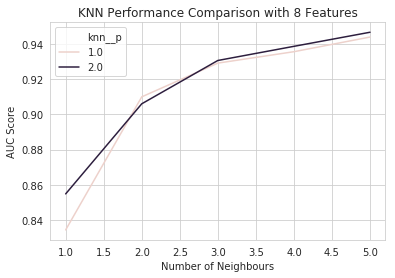

In [54]:
sns.set_style('whitegrid')
sns.lineplot(y= 'mean_score',x= 'knn__n_neighbors',data = results_KNN_8_features,hue = 'knn__p', legend = 'full')
plt.xlabel('Number of Neighbours')
plt.ylabel('AUC Score')
plt.title('KNN Performance Comparison with 8 Features')
plt.legend()
plt.show()

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='gini',random_state= 9)

The DT hyperparameters are as follows:

* max_depth and
* min_samples_split.

We aim to determine the optimal combinations of maximum depth (`max_depth`) and minimum sample split (`min_samples_split`).

In [56]:
pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('dt', dt_classifier)])

params_pipe_DT = {'rfi_fs__n_features_': [5, 8, input.shape[1]],
                 'dt__max_depth' : [3, 4, 5],
                 'dt__min_samples_split': [2, 5, 15, 20, 25]}

In [57]:
gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                           param_grid=params_pipe_DT, 
                           cv=cv_method,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1) 

In [58]:
## Fitting into the pipelined DT model

gs_pipe_DT.fit(input, target);

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   37.9s finished


In [59]:
gs_pipe_DT.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 25, 'rfi_fs__n_features_': 8}

In [60]:
gs_pipe_DT.best_score_

0.9257045541247444

***We observe that the optimal DT model has a mean AUC score of 0.925. The best performing DT model selected 8 features has a maximum depth of 4 and minimum split value of 20 samples.***

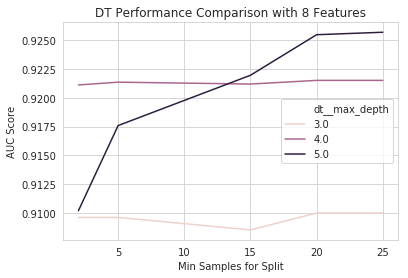

In [61]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_8_features = results_DT[results_DT['rfi_fs__n_features_'] == 8]

sns.set_style('whitegrid')

sns.lineplot(y= 'mean_score', x= 'dt__min_samples_split', data = results_DT_8_features, hue = 'dt__max_depth',markers=True ,legend='full')
plt.xlabel('Min Samples for Split')
plt.ylabel('AUC Score')
plt.title('DT Performance Comparison with 8 Features')
plt.legend()
plt.show()

## Naive Bayes ( Gaussian NB)
Gaussian NB requires each descriptive feature to follow a Gaussian distribution, that is normal distribution. Therefore we have first perform a power transformation on the input data before model fitting.

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
nb_classifier = GaussianNB()
pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', nb_classifier)])

params_pipe_NB = {'rfi_fs__n_features_': [5, 8, input.shape[1]],
                'nb__var_smoothing': np.logspace(1,-2, num=20)}

In [63]:
gs_pipe_NB = GridSearchCV(estimator=pipe_NB, 
                           param_grid=params_pipe_NB, 
                           cv=cv_method,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1) 

In [64]:
## Fitting into the pipelined NB model
input_transformed = PowerTransformer().fit_transform(input)
gs_pipe_NB.fit(input_transformed, target);

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   53.3s finished


In [65]:
gs_pipe_NB.best_params_

{'nb__var_smoothing': 0.37926901907322497, 'rfi_fs__n_features_': 8}

In [66]:
gs_pipe_NB.best_score_

0.938886744853097

In [67]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,nb__var_smoothing,rfi_fs__n_features_
28,0.938843,0.028241,0.986855,0.878024,0.379269,8.0
25,0.938693,0.027900,0.986111,0.878528,0.545559,8.0
34,0.938668,0.028244,0.986359,0.878276,0.183298,8.0
31,0.938591,0.028434,0.986607,0.877520,0.263665,8.0
43,0.938590,0.028413,0.986607,0.877268,0.061585,8.0


***The NB model gives best performance with AUC score of 0.938 with 8 features and best variance smoothing parameter is 0.06.***

In [68]:
results_NB_8_features = results_NB[results_NB['rfi_fs__n_features_'] == 8.0]

No handles with labels found to put in legend.


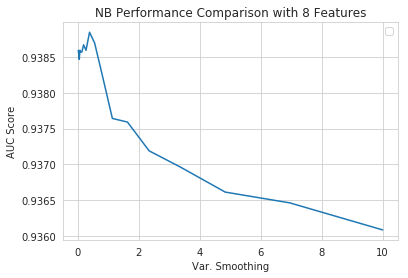

In [69]:
sns.set_style('whitegrid')
sns.lineplot(y= 'mean_score', x= 'nb__var_smoothing', data = results_NB_8_features)
plt.xlabel('Var. Smoothing')
plt.ylabel('AUC Score')
plt.title('NB Performance Comparison with 8 Features')
plt.legend()
plt.show()

## Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=9)
pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('rf', rf_classifier)])

params_pipe_RF = {'rfi_fs__n_features_': [5, 8, input.shape[1]],
                'rf__n_estimators': [100, 250, 500],
                'rf__max_depth': [5, 7, 10, 12]}

In [71]:
gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                           param_grid=params_pipe_RF, 
                           cv=cv_method,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1) 

In [72]:
## Fitting into the pipelined RF model

gs_pipe_RF.fit(input, target);

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.0min finished


In [73]:
gs_pipe_RF.best_params_

{'rf__max_depth': 10, 'rf__n_estimators': 500, 'rfi_fs__n_features_': 8}

In [74]:
gs_pipe_RF.best_score_

0.9603624394243324

We can see that single random forest classifier has the best AUC score and outperforms all the 3 models (KNN, NB and DT).
So, using random forest classifier has increased the predicitive power of our model.

In [75]:
results_RF = get_search_results(gs_pipe_RF)
results_RF.head()

,mean_score,std_score,max_score,min_score,rf__max_depth,rf__n_estimators,rfi_fs__n_features_
25,0.960341,0.015755,0.985367,0.925655,10.0,500.0,8.0
31,0.959930,0.016787,0.988591,0.920615,12.0,250.0,8.0
34,0.959904,0.017206,0.989087,0.921875,12.0,500.0,8.0
22,0.959772,0.016846,0.984375,0.919733,10.0,250.0,8.0
16,0.959349,0.018039,0.989087,0.917843,7.0,500.0,8.0


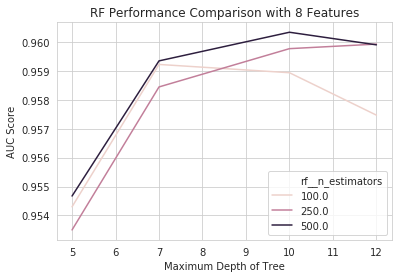

In [76]:
results_RF_8_features = results_RF[results_RF['rfi_fs__n_features_'] == 8.0]
sns.set_style('whitegrid')
sns.lineplot(y= 'mean_score', x= 'rf__max_depth', data = results_RF_8_features, hue = 'rf__n_estimators',legend = 'full' )
plt.xlabel('Maximum Depth of Tree')
plt.ylabel('AUC Score')
plt.title('RF Performance Comparison with 8 Features')
plt.legend()
plt.show()

# Performance Comparison

In this phase we will be measuring the performance of best estimators of all above four classifier model on the test data.
We will be using 100% of the dataset as the test data during the performance comparison phase **(this time using a different random seed)** and different cross validation, we will be evaluating our test data using **5-repeated 3-fold cross-validation**.

First let's check the performance of all the best estimators on our test data.

In [77]:
from sklearn.model_selection import cross_val_score

# changing the random seed
cv_method_ttest = RepeatedStratifiedKFold(n_splits=3, 
                                          n_repeats=5, 
                                          random_state=111)

In [78]:
cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=input,
                                 y=target, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

In [79]:
cv_results_KNN.mean().round(3)

0.943

In [80]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=input,
                                y=target, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean().round(3)

0.91

In [81]:
cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=input,
                                y=target, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean().round(3)

0.943

In [82]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=input,
                                y=target, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean().round(3)

0.96

***As per our analysis, Random Forest Classifier outperforms all the other classifiers. But to check whether the difference in the score of RF with respect to other classifiers is really significant or is it just by a chance, we will perform paired ttest and check the p-value for comparison with different models.***

In [83]:
from scipy import stats

print(stats.ttest_rel(cv_results_RF, cv_results_KNN).pvalue.round(3))
print(stats.ttest_rel(cv_results_RF, cv_results_DT).pvalue.round(3))
print(stats.ttest_rel(cv_results_RF, cv_results_NB).pvalue.round(3))


0.0
0.0
0.0


***From above it can be seen that the p-value of our paired t-test is less than 0.05. Thus, we conclude that, at a 95% level, the difference in the performance of Random Forest with respect to other models is statistically significant. Thus we conclude, Random Forest is statistically the best model in this competition (in terms of AUC) when compared on the test data.***

***Since our model objective is to predict those seedlots that can result in best soil conversation. The best practices will be used in the businesses so the importance of predicted positives i.e. 'best' is very significant and therefore we have to minimise the False Positives. We have to be very cautious that the predicted best are actually the best seedlots emphasizing that `'precision'` will be the metrics to evaluate our model on. Checking our model performance for the precision metrics using cross validation approach. Here the reason to check for the precision score via the cross validation is to avoid overfitting to some extent since the model is already fitted on the data.***

In [84]:
cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=input,
                                 y=target, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='precision')
cv_results_KNN.mean().round(3)

0.871

In [85]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=input,
                                y=target, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='precision')
cv_results_DT.mean().round(3)

0.854

In [86]:
cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=input,
                                y=target, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='precision')
cv_results_NB.mean().round(3)

0.838

In [87]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=input,
                                y=target, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='precision')
cv_results_RF.mean().round(3)

0.88

***Based on 'Precision' also Random Forest outperforms the other algorithms. So its right to conclude, Random Forest is basically the best model to predict the seedlot species for soil conservation.*** 

# Limitations and Solutions

- Our modeling strategy has a few limitations.Given the amount of data available here in the eucalyptus dataset is less and its around 630 observations,we have used 100% of the dataset as the training data during the hyperparameter tuning phase, and also use 100% of the dataset as the test data during the performance comparison phase but with a different random seed. The approach potentially results in overfitting. However, since both phases involve cross-validation, effects of overfitting shall be quite limited. In particular, you might just decide that this is an acceptable trade-off given the lack of enough observations to work with.


- Random Forest should be used where accuracy is up utmost priority and interpretability is not very important. Also, computational time is not a concern than the desired outcome.


- Further Expanding our model considering large organisations where end user is involved there is still heaps of scope to be improved. We could have further improved our model accuracy by tweaking and including other parameters of the classifiers. Specially, Random Forest is the best predictor we could have further explore with the different parameters

    - Hyperparameters of Random forest classifier:

                       bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False

# Summary

For the Eucalyptus dataset, Random Forest classifier is the best predictive model and outperforms every other model with respect to both **AUC score and Precison score.**


With only 8 best features selected by Random Forest Importance (RFI) produces the highest cross-validated AUC score on the training data. In addition, when evaluated on the test data (in a cross-validated fashion), the Random Forest model again outperforms k-Nearest Neighbor, Decision Tree and Naive Bayes models with respect to AUC. Also, the Random Forest model yields the highest precision score on the test data. We also observe that our models performance is not very sensitive to the number of predictors chosen to build the model on. Infact difference between the hyperparameter combinations is not really much when conditioned on the number of features selected. For this reason, it seems working with 8 features is preferable to working with the full feature set, which potentially avoids overfitting and results in models that are easier to train and easier to understand.





## Reference :


- Vanschoren, Joaquin. “Eucalyptus.” OpenML, https://openml.org/d/188.

- Bulluch B. T., (1992) Eucalyptus Species Selection for Soil Conservation in Seasonally Dry Hill Country - Twelfth Year Assessment New Zealand Journal of Forestry Science 21(1): 10 - 31 (1991)

- “Regression Case Study.” www.featureranking.com, https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/.


- “Case Study: Predicting Income Status.”
www.featureranking.com, https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/.


- “SK Part 3: Cross-Validation and Hyperparameter Tuning.” 
www.featureranking.com, https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/.


- “SK Part 4: Model Evaluation.” 
www.featureranking.com, 
https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-4-model-evaluation/.



- “SK Part 5: Advanced Topics: Pipelines, Statistical Model Comparison, and Model Deployment.” 
www.featureranking.com, 
https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-5-advanced-topics-pipelines-statistical-model-comparison-and-model-deployment/.
